In [39]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def C_time(t, C0, Cin, V, Q, k):
    """Analytical solution of dC/dt = (Q/V)(Cin - C) - k*C."""
    b = k + Q / V
    C_inf = (Q / V) * Cin / b
    C_t = C_inf + (C0 - C_inf) * np.exp(-b * t)
    return C_t, C_inf

def k_of_T(T, k_ref=0.3, T_ref=20.0, theta=1.07):
    """
    Simple temperature dependence for k:
        k(T) = k_ref * theta^(T - T_ref)
    """
    return k_ref * (theta ** (T - T_ref))

def percent_removal_after_2tau(V, Q, k, Cin, C0):
    """Percent removal after two residence times 2τ."""
    tau = V / Q
    t_eval = 2.0 * tau
    C_t, C_inf = C_time(np.array([t_eval]), C0, Cin, V, Q, k)
    C_end = C_t[0]
    return 100.0 * (1.0 - C_end / Cin)


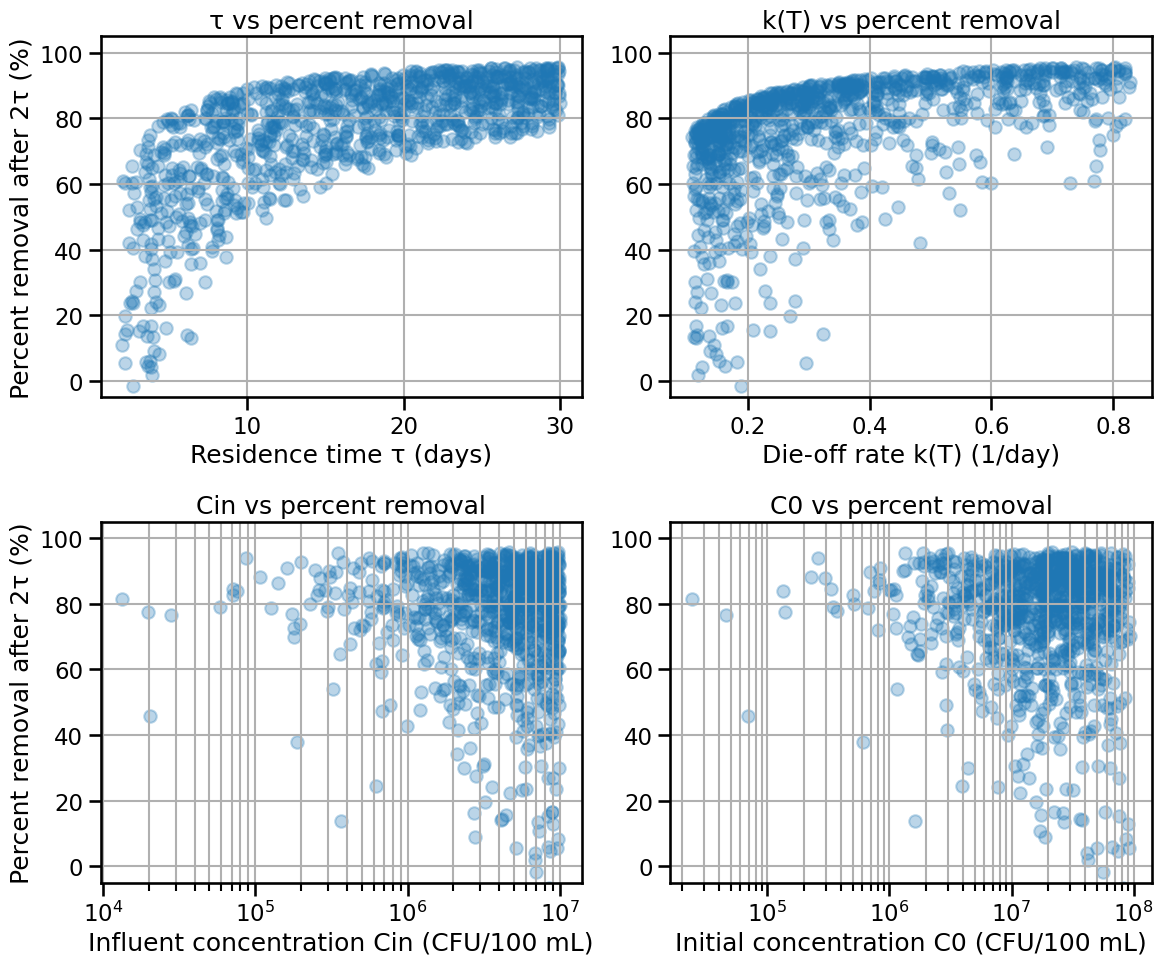

In [44]:
# Monte Carlo sensitivity: scatter plots with clean axes

n_sims   = 1000
Q_design = 200.0              # m^3/day fixed flow

# Sample ranges
tau_samples = np.random.uniform(2.0, 30.0, n_sims)   # residence time τ (days)
T_samples   = np.random.uniform(5.0, 35.0, n_sims)   # temperature (°C)
Cin_samples = np.random.uniform(1e4, 1e7, n_sims)    # influent (CFU/100 mL)
C0_factor   = np.random.uniform(1.0, 10.0, n_sims)   # spike factor
C0_samples  = Cin_samples * C0_factor                # initial pond concentration

# Derived
V_samples = tau_samples * Q_design                   # volume (m^3)
k_samples = k_of_T(T_samples)                        # k(T) (1/day)

# Compute percent removal after 2τ for each sample
removal_list = []
for V, k, Cin, C0 in zip(V_samples, k_samples, Cin_samples, C0_samples):
    rem = percent_removal_after_2tau(V, Q_design, k, Cin, C0)
    removal_list.append(rem)

removal = np.array(removal_list)

# ---- Scatter plots ----
plt.figure(figsize=(12,10))

# 1) τ vs removal
plt.subplot(2,2,1)
plt.scatter(tau_samples, removal, alpha=0.3)
plt.xlabel("Residence time τ (days)")
plt.ylabel("Percent removal after 2τ (%)")
plt.title("τ vs percent removal")
plt.ylim(-5, 105)
plt.grid(True)

# 2) k(T) vs removal
plt.subplot(2,2,2)
plt.scatter(k_samples, removal, alpha=0.3)
plt.xlabel("Die-off rate k(T) (1/day)")
plt.title("k(T) vs percent removal")
plt.ylim(-5, 105)
plt.grid(True)

# 4) Cin vs removal
plt.subplot(2,2,3)
plt.scatter(Cin_samples, removal, alpha=0.3)
plt.xlabel("Influent concentration Cin (CFU/100 mL)")
plt.ylabel("Percent removal after 2τ (%)")
plt.xscale("log")
plt.title("Cin vs percent removal")
plt.ylim(-5, 105)
plt.grid(True, which="both")

# 5) C0 vs removal
plt.subplot(2,2,4)
plt.scatter(C0_samples, removal, alpha=0.3)
plt.xlabel("Initial concentration C0 (CFU/100 mL)")
plt.xscale("log")
plt.title("C0 vs percent removal")
plt.ylim(-5, 105)
plt.grid(True, which="both")


plt.tight_layout()
plt.show()

